In [3]:
import pandas as pd
import statsmodels.api as sm

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Verificar nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#**Modelo de regresión logística**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [10]:
x =  df.iloc[:,[5,6,7]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.665234
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                 0.01416
Time:                        03:40:51   Log-Likelihood:                -473.65
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                  0.001108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0135      0.003     -5.273      0.000      -0.019      -0.008
SibSp         -0.1952      0.

In [11]:
freq = df.groupby(['Sex']).count()
freq

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,259,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453,453


In [12]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-12-8d0d7571fd9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex2"] = 0
<ipython-input-12-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-12-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 72.3+ KB


In [14]:
x =  df.iloc[:,[5,6,7,11]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.529400
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2155
Time:                        03:40:51   Log-Likelihood:                -376.93
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.271e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0332      0.003     -9.643      0.000      -0.040      -0.026
SibSp         -0.4121      0.

In [15]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Volver puerto de embarque numerica
y con esas variables hacer una regresion 
descartar 2 variables y escoger 3 VARIABLES
EDAD,SEXO,ESP/HERM,CLASE, PUERTA DE EMBARQUE
y hallar el mejor valor de r^2

In [16]:
df["Embarked2"] = 0
df.Embarked2.loc[df.Embarked=="C"] = 0
df.Embarked2.loc[df.Embarked=="Q"] = 1
df.Embarked2.loc[df.Embarked=="S"] = 2
df

<ipython-input-16-fac68ea6f1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked2"] = 0
<ipython-input-16-fac68ea6f1f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="C"] = 0
<ipython-input-16-fac68ea6f1f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="Q"] = 1
<ipython-input-16-fac68ea6f1f9>:4: Settin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
 12  Embarked2    712 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 77.9+ KB


In [18]:
x =  df.iloc[:,[2,5,6,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475808
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2949
Time:                        03:40:51   Log-Likelihood:                -338.78
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 4.216e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6250      0.093     -6.698      0.000      -0.808      -0.442
Age           -0.0047      0.

Hallar los mejores 3 r^2

In [19]:
import itertools
max_pseudo_rsq = 0
best_variable_combination = ""
variables = ["Age", "Sex2", "SibSp", "Pclass", "Embarked2"]
combinations = itertools.combinations(variables, 3)
for combination in combinations:
    x = df[list(combination)]
    y = df["Survived"]
    logit_model = sm.Logit(y, x)
    result = logit_model.fit()
    print(result.summary())
    if result.prsquared > max_pseudo_rsq:
        max_pseudo_rsq = result.prsquared
        best_variable_combination = ", ".join(combination)
print("La mejor combinación de variables es:", best_variable_combination)
print("Pseudo R-squared:", max_pseudo_rsq)

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2144
Time:                        03:40:51   Log-Likelihood:                -377.45
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0334      0.003     -9.724      0.000      -0.040      -0.027
Sex2           2.4066      0.

**La mejor combinación de variables es: Sex2, SibSp, Pclass
Pseudo R-squared: 0.29389178324802545** 

In [20]:
best_combination = None
best_pseudo_r_squared = 0

for combination in itertools.combinations(['Age', 'Sex2', 'SibSp', 'Pclass', 'Embarked2'], 3):
    x = df[list(combination)]
    y = df['Survived']
    logit_model = sm.Logit(y, x)
    result = logit_model.fit()
    pseudo_r_squared = result.prsquared
    
    if pseudo_r_squared > best_pseudo_r_squared:
        best_combination = combination
        best_pseudo_r_squared = pseudo_r_squared

print(f"La mejor combinación de tres variables es {best_combination}, con un Pseudo R-squared de {best_pseudo_r_squared}")

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477465
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.516353
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.644205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661388
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.476476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517548
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477850
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645285
  

In [21]:
df["Ninos"] = 0
df.Ninos.loc[df.Age<12] = 1
df.Ninos.loc[df.Age>=12] = 0
df

<ipython-input-21-43238c0d332c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ninos"] = 0
<ipython-input-21-43238c0d332c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ninos.loc[df.Age<12] = 1
<ipython-input-21-43238c0d332c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ninos.loc[df.Age>=12] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2,Ninos
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1,1,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,0


In [22]:
freq = df.groupby(['Ninos']).count()
freq

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2
Ninos,,,,,,,,,,,,,
0,644,644,644,644,644,644,644,644,644,644,644,644,644
1,68,68,68,68,68,68,68,68,68,68,68,68,68


In [23]:
x =  df.iloc[:,[5,6,11]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2144
Time:                        03:40:52   Log-Likelihood:                -377.45
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0334      0.003     -9.724      0.000      -0.040      -0.027
SibSp         -0.4542      0.

**Entrenamiento, pruebas y predicciones**

In [24]:
from sklearn.model_selection import train_test_split

#Predicciones con scikit-learn
train, test = train_test_split(df, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  569
Ejemplos usados para test:  143


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 153
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  143 non-null    int64  
 1   Survived     143 non-null    int64  
 2   Pclass       143 non-null    int64  
 3   Name         143 non-null    object 
 4   Sex          143 non-null    object 
 5   Age          143 non-null    float64
 6   SibSp        143 non-null    int64  
 7   Parch        143 non-null    int64  
 8   Ticket       143 non-null    object 
 9   Fare         143 non-null    float64
 10  Embarked     143 non-null    object 
 11  Sex2         143 non-null    int64  
 12  Embarked2    143 non-null    int64  
 13  Ninos        143 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 16.8+ KB


In [26]:
#Se definen las variables
x_train = train.iloc[:,[5,6,7,11]]
y_train = train.Survived
x_test = test.iloc[:,[5,6,7,11]]
y_test = test.Survived

In [27]:
logit_model=sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.532054
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2130
Time:                        03:40:52   Log-Likelihood:                -302.74
converged:                       True   LL-Null:                       -384.66
Covariance Type:            nonrobust   LLR p-value:                 2.723e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0320      0.004     -8.354      0.000      -0.039      -0.024
SibSp         -0.4451      0.

In [28]:
# Realizar predicciones sobre el dataset de pruebas
yhat = result.predict(x_test)
prediction = list(map(round, yhat))
  
# Comparar l
print('Actual values', list(y_test))
print('Predictions :', prediction)

Actual values [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
Predictions : [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


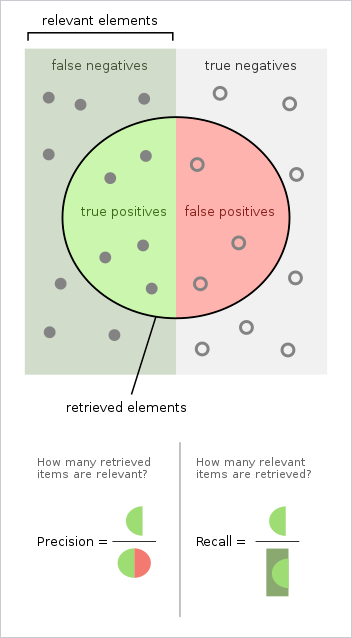

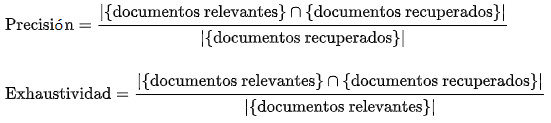

**Prediccion, conteo de los valores de la precision y la exahustividad calcular los verdaderos positivos, falsos negativos y falsos positivos**

> Bloque con sangría




In [29]:
true_positive = sum([1 for pred, real in zip(prediction, y_test) if pred == 1 and real == 1])
false_positive = sum([1 for pred, real in zip(prediction, y_test) if pred == 1 and real == 0])
true_negative = sum([1 for pred, real in zip(prediction, y_test) if pred == 0 and real == 0])
false_negative = sum([1 for pred, real in zip(prediction, y_test) if pred == 0 and real == 1])

print('Verdadero Positivo: ', true_positive)
print('Falso Positivo: ', false_positive)
print('Verdadero negativo', true_negative)
print('Falso negativo', false_negative)

Verdadero Positivo:  37
Falso Positivo:  11
Verdadero negativo 76
Falso negativo 19


In [30]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print("Precisión: ", precision)
print("Exhaustividad: ", recall)

Precisión:  0.7708333333333334
Exhaustividad:  0.6607142857142857


**Prediccion, conteo de los valores de la precision y la exahustividad calcular los verdaderos positivos, falsos negativos y falsos positivos con los 3 mejores R^2**

In [33]:
#Se definen las variables
x_train = train.iloc[:,[2, 6, 11]]
y_train = train.Survived
x_test = test.iloc[:,[2, 6, 11]]
y_test = test.Survived

In [34]:
logit_model=sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.471534
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.2997
Time:                        03:41:14   Log-Likelihood:                -268.30
converged:                       True   LL-Null:                       -383.11
Covariance Type:            nonrobust   LLR p-value:                 1.387e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6585      0.062    -10.554      0.000      -0.781      -0.536
SibSp         -0.1285      0.

In [35]:
# Realizar predicciones sobre el dataset de pruebas
yhat = result.predict(x_test)
prediction = list(map(round, yhat))
  
# Comparar l
print('Actual values', list(y_test))
print('Predictions :', prediction)

Actual values [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
Predictions : [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]


In [36]:
true_positive = sum([1 for pred, real in zip(prediction, y_test) if pred == 1 and real == 1])
false_positive = sum([1 for pred, real in zip(prediction, y_test) if pred == 1 and real == 0])
true_negative = sum([1 for pred, real in zip(prediction, y_test) if pred == 0 and real == 0])
false_negative = sum([1 for pred, real in zip(prediction, y_test) if pred == 0 and real == 1])

print('Verdadero Positivo: ', true_positive)
print('Falso Positivo: ', false_positive)
print('Verdadero negativo', true_negative)
print('Falso negativo', false_negative)

Verdadero Positivo:  42
Falso Positivo:  18
Verdadero negativo 65
Falso negativo 18


In [37]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print("Precisión: ", precision)
print("Exhaustividad: ", recall)

Precisión:  0.7
Exhaustividad:  0.7
